# Titulación Ácido-Base

Una titulación o valoración es una técnica de análisis químico cuantitativo que permite determinar la concentración desconocida de una disolución **ANALITO**, por medio de hacerla reaccionar con otra disolución de la cual conocemos su concentración y a la cual denominamos **TITULANTE**.

Una titulación Acído-Base consistirá entonces en determinar la concentración de una disolución de un ácido o una base.

Una **curva de titulación** será un diagrama que nos muestra los valores de pH de la disolución analito conforme es titulada.

## Curvas de Titulación

### 1.- Ácido débil con base fuerte.

Un ácido débil es aquel que no presenta disociación completa de protones en disolución acuosa. En disolución acuosa presenta el siguiente equilibrio:

$$HA \leftrightarrow H^{+}+A^{-}$$

a partir de la cual podemos definir una constante de disociación ácida:

$$K_{a}=\frac{[H^{+}][A^{-}]}{HA}$$

Tenemos la titulación de un ácido débil con una base fuerte:
$$H(Ac)+NaOH \rightarrow Na(Ac)+H_{2}O$$

Para realizar un estudio teórico de esta titulación debemos obtener ecuaciones que nos permitan relacionar en todo momento, las concentraciones de las especies de disolución y a partir de estas deberemos poder calcular el valor del pH.

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

#Concentraciones 
Ca=0.2 #Concentración del analito
Va=50 #Volumen del analito

Cb=0.05 #Concetración del titulante

pK_a=4.75 #Ácido acético

Calculamos la constante de disociación ácida:


In [2]:
Ka=10.0**(-pK_a)
K_w=1.0e-14

La ecuación central que usaremos en este método para trazar la curva de titulación es la siguiente, la cual se defeine como la fracción de titulación:

$$\Phi=\frac{C_{b}V_{b}}{C_{a}V_{a}}=\frac{a_{A}-\frac{[H^{+}]-[OH^{-}]}{C_{a}}}{1+\frac{[H^{+}]-[OH^{-}]}{C_{b}}}$$

Cuando $\Phi=1$ nos encontramos en el punto de equivalencia. En esta ecuación tenemos que $a_{A}$ es la disociación del ácido débil, que se calcula como:

$$a_{A}=\frac{K_{a}}{[H^{+}]+K_{a}}$$

In [3]:
pH_ini=5
pH_fin=7
puntos=300

pH_valores=np.linspace(pH_ini,pH_fin,puntos)
Vb_valores=[]

Para calcular los puntos de la curva, damos un valor de pH y a partir de las ecuaciones anteriores determinamos cuánto volumen de la base es necesario adicionar para alcanzar ese valor de pH.

$$Vb= \Phi \frac{C_{a}V_{a}}{C_{b}}$$

Consideramos también:

$$[OH^{-}]=\frac{K_{\omega}}{[H^{+}]}$$

In [4]:
for pH in pH_valores:
    H=10**(-pH)
    OH=K_w/H
    
    #Alfa de disociación del ácido:
    alpha_A=Ka/(H+Ka)
    #Fracción de titulación:
    Fi=(alpha_A-(H-OH)/Ca)/(1.0+(H-OH)/Cb)
    
    #Calculamos el volumen del titulante:
    V_b=Fi*(Ca*Va)/Cb
    
    Vb_valores.append(V_b)

Finalmente, graficamos el pH en función del volumen del titulante agregado:

<IPython.core.display.Javascript object>


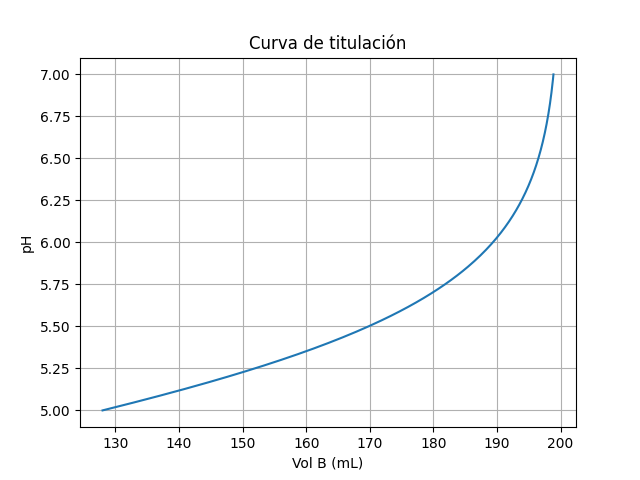

In [5]:
plt.plot(Vb_valores, pH_valores)
plt.title("Curva de titulación")
plt.xlabel("Vol B (mL)")
plt.ylabel("pH")
plt.grid()
plt.show()

### 2.- Ácido débil - Base débil

En este caso, tenemos que la base presenta el siguiente equilibrio en disolución: 

$$H_{2}O+B \rightarrow BH^{+}+OH^{-}$$

y tendremos asociada la siguiente constante de basicidad:

$$K_{b}= \frac{[BH^{+}][OH^{-}]}{[B]}$$

In [6]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

#Concentraciones 
Ca=0.2 #Concentración del analito
Va=50 #Volumen del analito

Cb=0.05 #Concetración del titulante

pK_a=4.75 #Ácido acético

La base protonada, presentará también disociación de acuerdo a la siguiente reacción:

$$BH^{+} \rightarrow B+H^{+}$$

que tendrá asociada la siguiente constante de disociación:

$$K_{BH} = \frac{[B][H^{+}]}{[BH^{+}]} $$

In [7]:
pK_b=2
pK_BH=14.0-pK_b

#Constante de disociación
K_a=10.0**(-pK_a)
K_b=10.0**(-pK_b)
K_w=1.0e-14

K_BH=K_w/K_b

Al igual que en el caso anterior:

$$\Phi=\frac{C_{b}V_{b}}{C_{a}V_{a}}=\frac{a_{A}-\frac{[H^{+}]-[OH^{-}]}{C_{a}}}{a_{HB}+\frac{[H^{+}]-[OH^{-}]}{C_{b}}}$$

donde tenemos que $a_{BH}$ es la disociación de la base débil:

$$a_{BH}=\frac{[H^{+}]}{[H^{+}]+K_{HB}}$$

In [8]:
pH_ini=1
pH_fin=10
puntos=100

pH_valores=np.linspace(pH_ini,pH_fin,puntos)
Vb_valores=[]

In [9]:
for pH in pH_valores:
    H=10**(-pH)
    OH=K_w/H
    alpha_A=K_a/(H+K_a)
    alpha_BH=H/(H+K_BH)
    
    #Fracción de titulación:
    Fi=(alpha_A-(H-OH)/Ca)/(alpha_BH+(H-OH)/Cb)
    
    #Calculamos el volumen del titulante:
    V_b=Fi*(Ca*Va)/Cb
    
    Vb_valores.append(V_b)

Finalmente graficamos:

<IPython.core.display.Javascript object>


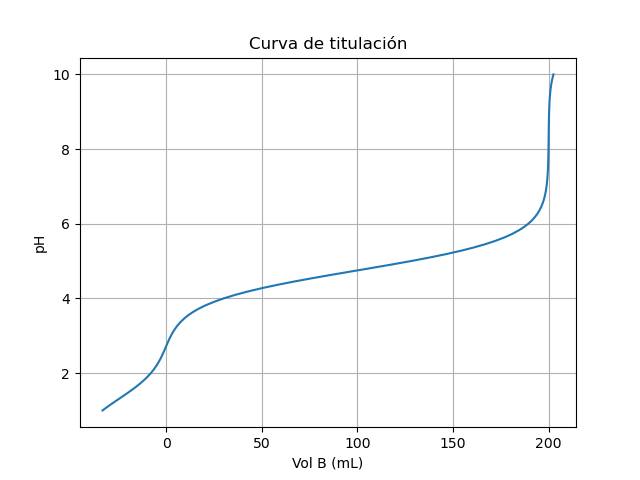

In [10]:
plt.plot(Vb_valores, pH_valores)
plt.title("Curva de titulación")
plt.xlabel("Vol B (mL)")
plt.ylabel("pH")
plt.grid()
plt.show()